# Part I: Introduction

## 1. Backgroud

## 2. Problem Formulation

## 3. Aims

# Part II: Dataset

## 1. Dataset Description

In [1]:
import pandas as pd

***Description***

We are utilizing the [S&P 500 stock data](https://www.kaggle.com/datasets/camnugent/sandp500) dataset from Kaggle for our analysis. This dataset, last updated in 2018, is a comprehensive collection of historical stock prices for all companies currently listed on the S&P 500 index. The data spans a period of 5 years, providing a rich source of information for our study.

The dataset is well-structured and can be divided to analyze each individual company separately. This is facilitated by the `individual_stocks_5yr` folder, which contains data files for individual stocks. Each file is labelled by the respective company's stock ticker name, making it easy to locate and analyze data for a specific company.

Each file in the dataset contains the following columns:

- `Date`: This column records the date of the trading day in the format: yy-mm-dd. It allows us to track the stock's performance over time.
- `Open`: This column records the price of the stock at market open. This data is from the NYSE, so all prices are in USD. It provides a starting point for the day's trading.
- `High`: This column records the highest price the stock reached during the trading day. It gives us an idea of the stock's potential for the day.
- `Low`: This column records the lowest price the stock reached during the trading day. It provides insight into the stock's risk for the day.
- `close` : Closing price of the stock at the end of the trading day. Tt is a commonly used reference point for investors to assess the performance of a particular stock over time.
- `Volume`: This column records the number of shares traded during the trading day. It gives us an idea of the stock's liquidity and popularity.
- `Name`: This column records the ticker name of the stock. It allows us to identify the stock.

To provide a more focused context for this project, our team has chosen to analyze a specific company - Apple, one of the world's largest technology companies. Its stock is listed on the index as AAPL. The dataset we're using for this analysis is named `AAPL_data.csv`. Following is an overview visualization of the dataset:

In [2]:
df = pd.read_csv("dataset/AAPL_data.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


A noteworthy characteristic of this dataset is the data column. Notably, the date `08-02-2013` falls on a Friday, and the subsequent date in the dataset, `11-02-2013`, is a Monday. This suggests that the data is recorded only on **weekdays**.

***Key Features***

Some statistic about this dataset: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [4]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


Originally, there is no null value

In [5]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In this project context, we are working with time seri analysis so we just need to use two columns: `date` and `close`.

In [6]:
df = df[['date', 'close']]
df.head()

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556


QQ Plot

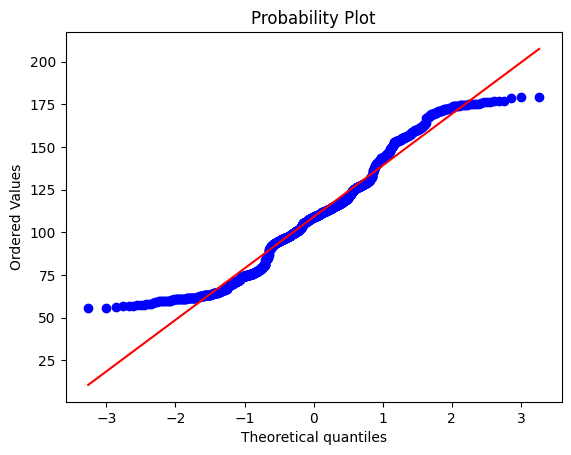

In [7]:
import scipy.stats 
import pylab

#Plot the QQ plot
scipy.stats.probplot(df['close'], dist="norm", plot=pylab)
pylab.show()

A Q-Q (quantile-quantile) plot is a graphical tool that helps us assess if a dataset follows a particular theoretical distribution. It plots the quantiles of the dataset against the quantiles of the chosen theoretical distribution.

If the data follows the chosen distribution, the points in the Q-Q plot will approximately lie on the line y = x. If the data does not follow the distribution, the points will deviate from this line.

&rarr; Some observation of `close` deviate significantly for the linear line indicating that the stock price does not follow the Normal Distribution

## 2. Preprocessing

### 1. Set the data column as index

Set the `date` column of the DataFrame df as the index of the DataFrame

In [8]:
# Ensure that 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)


`inplace=True`: specifies that the operation should be performed on the DataFrame df itself, rather than returning a new DataFrame with the specified changes

By setting the index, we are essentially specifying which column should be used to label/indentify the rows of the DataFrame.

The date column in this dataset is already in the default format: mm/dd/yyyy. However, if another dataset uses the format dd/mm/yyyy, we would need to specify the parameter dayfirst=True.

Look again the dataset, now the `date` was marked as index instead of a numerical order column as previous

In [9]:
df.head()

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556


Start date and End date

In [10]:
df.index.min(), df.index.max()

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

*`date` is now index so we can not use df[`date`] anymore*

### 2. Set the frequency

All time periods must be equals and clearly definded, which would result in a constant Frequency

As highlighted in the previous section, the data is recorded exclusively on weekdays. Therefore, we will set the frequency to 'business day', denoted as `B` which is from Monday to Friday.

In [11]:
# Set the frequency of the DataFrame index
df = df.asfreq('B') # 'B' is the business day frequency

Check agin the null value in the dataset

In [12]:
df.isnull().sum()

close    45
dtype: int64

We observe 45 missing values, which is unexpected. As previously mentioned, the original dataset records dates only on weekdays. Therefore, when we set the frequency to 'B' for business days, we shouldn't encounter any missing values. To investigate this discrepancy, we will print out these missing values.

In [13]:
# Find the dates where 'Close' is null
missing_dates = df[df['close'].isnull()].index

# Print out the missing dates and the day of the week
for date in missing_dates:
    print(f"Date: {date}, Day of Week: {date.day_name()}")

Date: 2013-02-18 00:00:00, Day of Week: Monday
Date: 2013-03-29 00:00:00, Day of Week: Friday
Date: 2013-05-27 00:00:00, Day of Week: Monday
Date: 2013-07-04 00:00:00, Day of Week: Thursday
Date: 2013-09-02 00:00:00, Day of Week: Monday
Date: 2013-11-28 00:00:00, Day of Week: Thursday
Date: 2013-12-25 00:00:00, Day of Week: Wednesday
Date: 2014-01-01 00:00:00, Day of Week: Wednesday
Date: 2014-01-20 00:00:00, Day of Week: Monday
Date: 2014-02-17 00:00:00, Day of Week: Monday
Date: 2014-04-18 00:00:00, Day of Week: Friday
Date: 2014-05-26 00:00:00, Day of Week: Monday
Date: 2014-07-04 00:00:00, Day of Week: Friday
Date: 2014-09-01 00:00:00, Day of Week: Monday
Date: 2014-11-27 00:00:00, Day of Week: Thursday
Date: 2014-12-25 00:00:00, Day of Week: Thursday
Date: 2015-01-01 00:00:00, Day of Week: Thursday
Date: 2015-01-19 00:00:00, Day of Week: Monday
Date: 2015-02-16 00:00:00, Day of Week: Monday
Date: 2015-04-03 00:00:00, Day of Week: Friday
Date: 2015-05-25 00:00:00, Day of Week: Mond

None of the missing values fall on weekends, suggesting they might correspond to holidays or other non-trading days not included in the original dataset. Initially, these dates were not present in the dataset. However, when we resampled the data to business day frequency, these missing dates emerged.

Now we deal with the remainder missing values with the help of fillna() method. This method go through the dataset and fill out the missing values by different ways:

- Front Filling: Assign the value of the previous period. Ex: the day 8/1 is missing then it will be assigned the value of the day 7/1
- Back Filling:..........
- Assigning the same value: Assign the average to all the missing values within the timeseries. usually, filling by this way is not recommend in time seri since there are underlying time variance patterns in the data.



In [14]:
# Handle any missing values that may have been introduced by asfreq
df['close'].interpolate(method='time', inplace=True)
df.isnull().sum()

/tmp/ipykernel_20135/1446985660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['close'].interpolate(method='time', inplace=True)


close    0
dtype: int64

### 3. Check Stationary

#### 1. Visualize

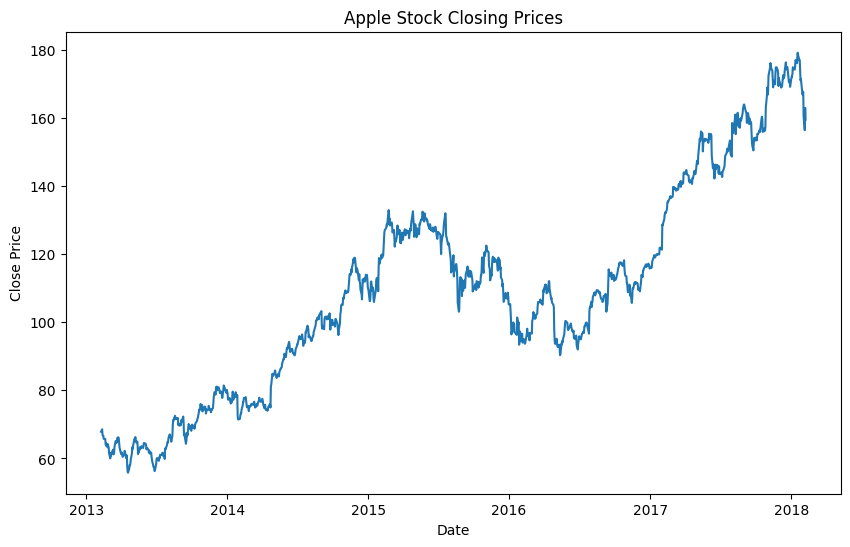

In [15]:
import matplotlib.pyplot as plt


# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#### 2. Decomposite

https://www.youtube.com/watch?v=4Vq8KqbHKh8

https://www.youtube.com/watch?v=1NXryMoU7Ho

https://www.youtube.com/watch?v=l_EDA7rDH3s&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=5

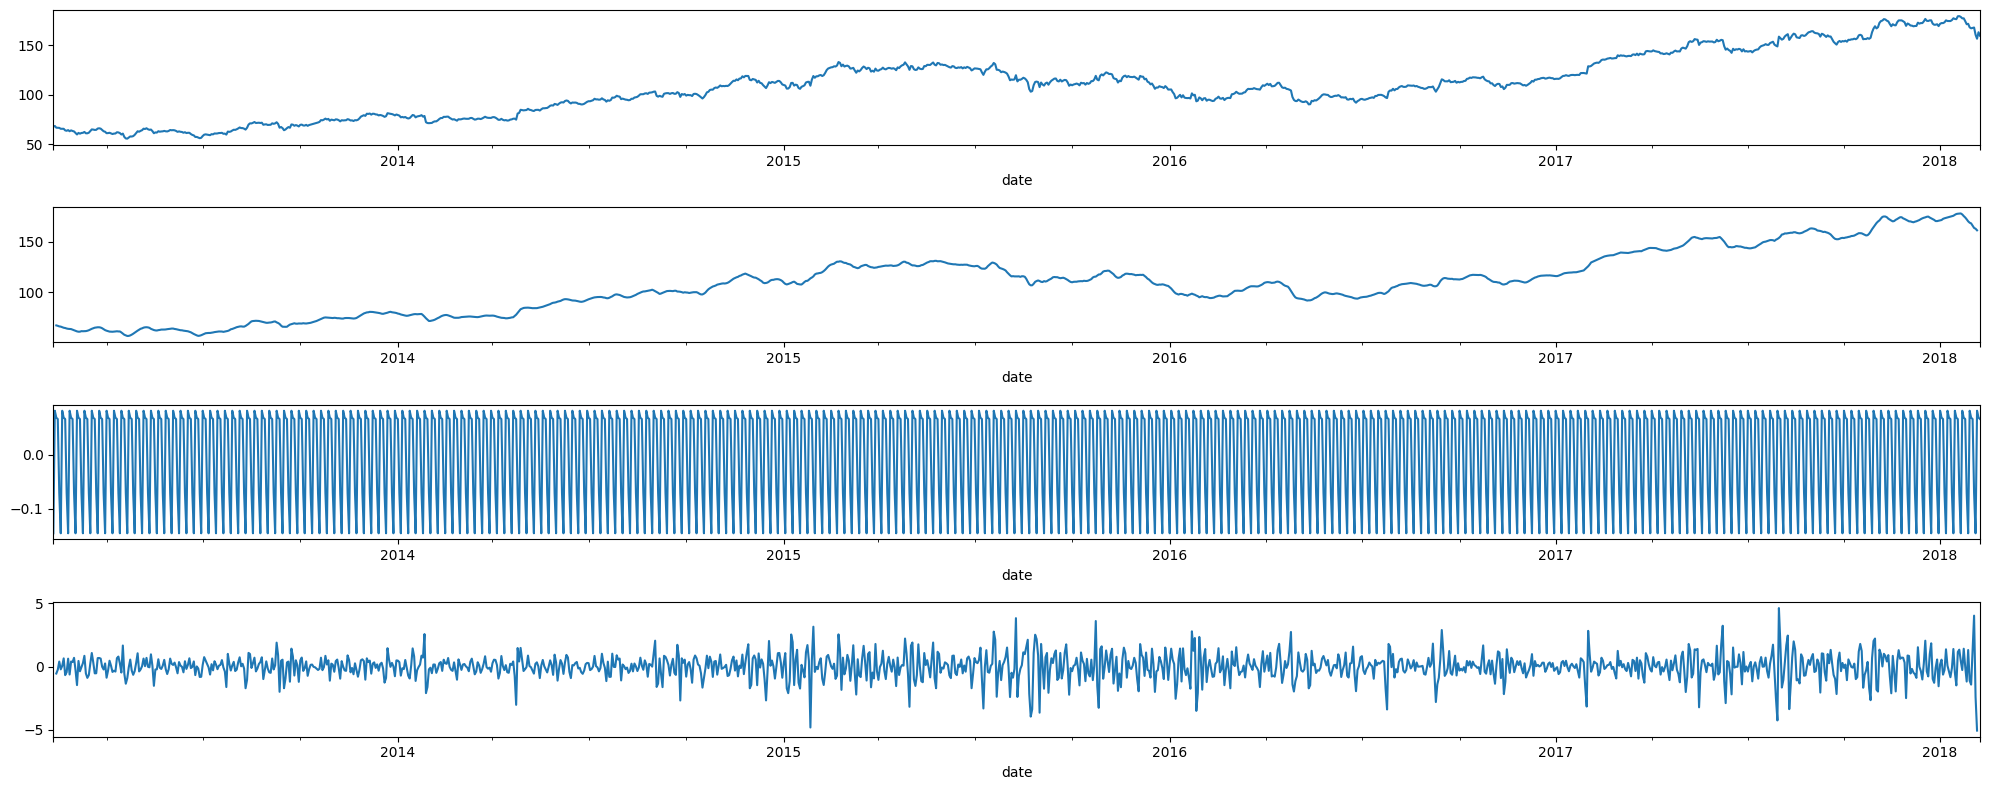

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(df['close'], model='additive')
#result = seasonal_decompose(df['close'], model='multiplicative')

# Get the figure and axes for the plot
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,8))

# Plot the original series, trend, seasonal component, and residuals 
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

# Show the plot
plt.tight_layout()
plt.show()

- The Trend graph indicates there is trend in our time seri
- The Seasonality graph indicates there is no sensonality in our time seri
- Using Residual graph to detect any anomalies/outlies.

Check for anomaly

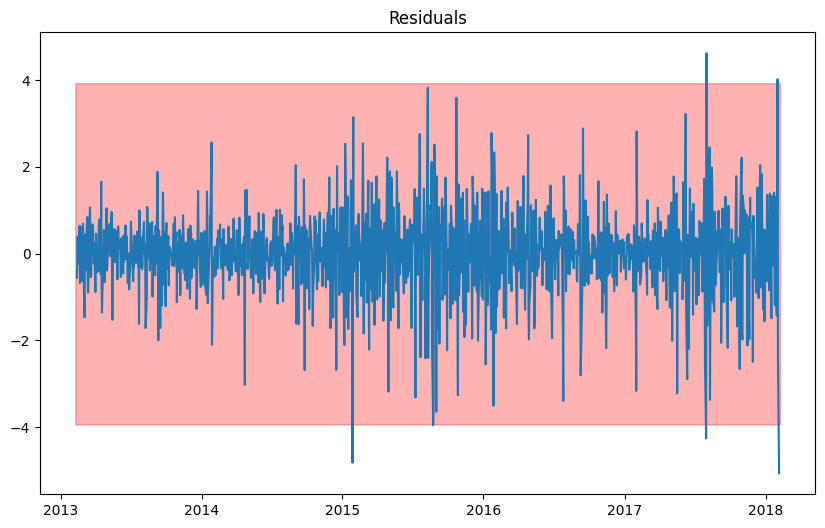

In [17]:
resid_mu = result.resid.mean()
resid_std = result.resid.std()

threshold = 4
lower_bound = resid_mu - threshold*resid_std
upper_bound = resid_mu + threshold*resid_std

plt.figure(figsize=(10, 6))
plt.plot(result.resid)
plt.fill_between(result.resid.index, lower_bound, upper_bound, color='red', alpha=0.3)
plt.title('Residuals')
plt.show()

Choosing a threshold for anomaly detection often depends on the specific context and the nature of your data. A common approach is to use the standard deviation, with any data point more than 3 standard deviations away from the mean considered an anomaly. However, this might not be suitable for all datasets, especially if the data is not normally distributed.

In terms of handling anomalies, it again depends on the context:

1. **If the anomalies are errors or noise:** If you believe the anomalies are due to errors, noise, or outliers that are not representative of your underlying data, you might choose to remove or correct them. For example, if you're analyzing sales data and an anomaly is due to a data entry error, it might make sense to correct or remove that data point.

2. **If the anomalies are significant events:** If the anomalies represent significant events or behaviors, you might choose to keep them. For example, in stock market data, a significant drop or rise in price could be an important event that you wouldn't want to remove.

3. **For predictive modeling:** If you're building a predictive model, you might choose to keep the anomalies but create a separate binary feature indicating whether a data point is an anomaly. This can help the model learn both the general trend and the anomalies.

Remember, the key is understanding your data and the reason for the anomalies, and then making an informed decision based on that understanding.

Print out anomalies days in data

In [18]:
# Create a mask for anomalies
anomaly_mask = (result.resid < lower_bound) | (result.resid > upper_bound)

# Get the dates of the anomalies
anomaly_dates = result.resid.index[anomaly_mask]

# Print the anomaly dates
print(anomaly_dates)

DatetimeIndex(['2015-01-27', '2015-08-24', '2017-07-31', '2017-08-01',
               '2018-02-01', '2018-02-05'],
              dtype='datetime64[ns]', name='date', freq=None)


Handle these anomalies ?????

#### 3. ADF Test

https://www.youtube.com/watch?v=l_EDA7rDH3s&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=5

ADF test then use difference to time seri, then test again

In [19]:
from statsmodels.tsa.stattools import adfuller

# Stationarity check
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(df['close'])




ADF Statistic: -0.660437
p-value: 0.856733
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


If p-value > 0.05, the series is not stationary.In that case, you need to make the series stationary. There are several methods to make a non-stationary time series stationary, and differencing and returns are two of them.

- Differencing: This method involves calculating the difference between consecutive observations. This is often effective at removing a trend. In Python, you can use the diff() function in pandas to apply differencing.

- Returns: This method is often used in financial time series. It involves calculating the percentage change between consecutive observations. This can be more effective than differencing at stabilizing the variance of a time series. In Python, you can use the pct_change() function in pandas to calculate returns.

Each method has its advantages and is suitable for different situations. Differencing is simple and can effectively remove linear trends, but it may not always stabilize the variance of the time series. Returns can stabilize the variance and are more suitable for financial time series where relative changes are more important than absolute changes.

However, both methods can only make a series stationary if the non-stationarity is caused by a trend or seasonality. If the series is non-stationary due to a structural break (a sudden change in the series at a certain point), then these methods may not be effective.

In [20]:
# Making the series stationary by differencing
df['close_diff'] = df['close'].diff(1)
df = df.iloc[1:] # Drop the first row since it will be NaN
# Check stationarity of the differenced series
check_stationarity(df['close_diff'])

ADF Statistic: -17.326398
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


The first period will have no previous value to minus so it will be null

In [21]:
df.head()

,close,close_diff
date,,
2013-02-11,68.5614,0.7072
2013-02-12,66.8428,-1.7186
2013-02-13,66.7156,-0.1272
2013-02-14,66.6556,-0.0600
2013-02-15,65.7371,-0.9185


In [22]:
# Making the series stationary by returning 
df['close_return'] = df['close'].pct_change(1).mul(100)
df = df.iloc[1:] # Drop the first period

check_stationarity(df['close_return'])

ADF Statistic: -34.794532
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [23]:
# Making the series stationary by returning 
df['close_return'] = df['close'].pct_change(1).mul(100)
df = df.iloc[1:] # Drop the first period

check_stationarity(df['close_return'])

ADF Statistic: -34.743520
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Both the differenced series and the returns series have p-values of 0.000000 in the Augmented Dickey-Fuller (ADF) test, which means both series are stationary. 

However, the ADF statistic for the returns series (-34.794532) is more negative than the ADF statistic for the differenced series (-17.326398). The more negative this statistic, the stronger the rejection of the hypothesis that the time series is non-stationary.

So, based on these results, the returns method (`df['close'].pct_change(1).mul(100)`) has made the series more stationary than the differencing method (`df['close'].diff()`). 

Remember, these tests only provide statistical evidence. It's also important to visualize your data and use domain knowledge when deciding which method is more appropriate for your specific use case.

In [24]:
df = df.drop('close', axis=1)
df.head()

,close_diff,close_return
date,,
2013-02-13,-0.127200,-0.190297
2013-02-14,-0.060000,-0.089934
2013-02-15,-0.918500,-1.377979
2013-02-18,-0.018225,-0.027724
2013-02-19,-0.006075,-0.009244


### 4. Spliting the dateset

An importance note that timeseries data relies on keeping the chronological order/ time order of the values. Therefore, data in timeseries should be uninterrupted sequences of values →The training set should include all values from the beggining to a specific point in time 

In [25]:
size = int(len(df)*0.8)
df_train = df.iloc[:size]  #df is the training set, account for 80% of the dataset
df_test = df.iloc[size:]

Check for two new set

In [26]:
df_train.tail()

,close_diff,close_return
date,,
2017-02-01,7.40,6.098063
2017-02-02,-0.22,-0.170874
2017-02-03,0.55,0.427916
2017-02-06,1.21,0.937403
2017-02-07,1.24,0.951723


In [27]:
df_test.head()

,close_diff,close_return
date,,
2017-02-08,0.51,0.387744
2017-02-09,0.38,0.287792
2017-02-10,-0.30,-0.226552
2017-02-13,1.17,0.885559
2017-02-14,1.73,1.297922


## 3. Hyperparameter

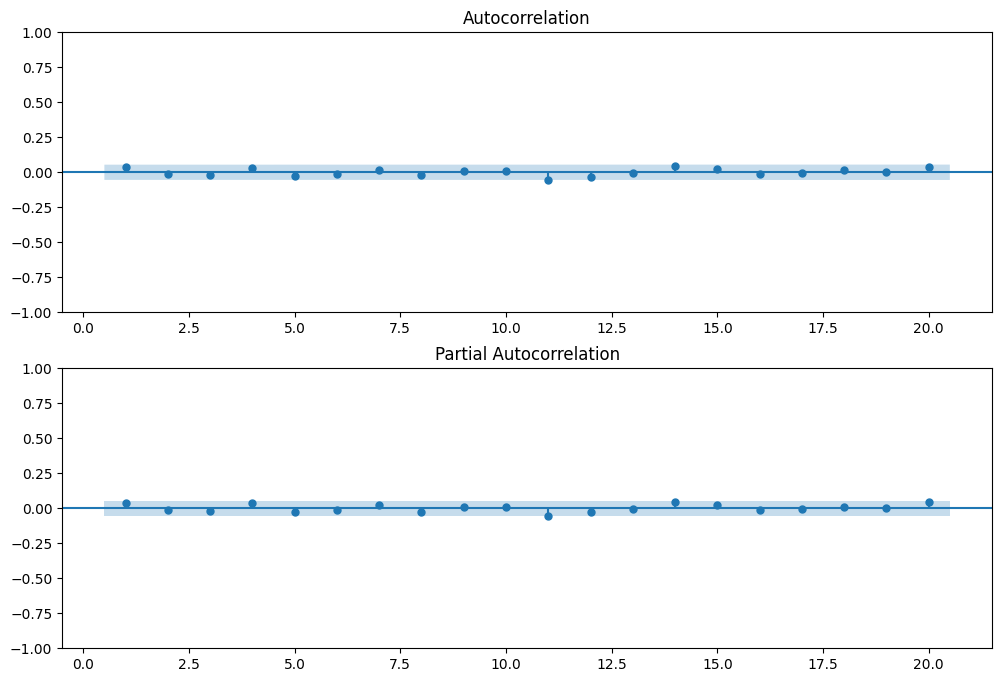

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'close' is your time series column
series = df['close_return']

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot ACF
plot_acf(series, ax=ax1, lags=20, zero=False) #zero=False to remove the lag 0 correlation (1.0) from the plot

# Plot PACF
plot_pacf(series, ax=ax2, lags=20, zero=False)

# Show the plot
plt.show()

One lags with significant greater than 0 should be added to the model. PACF helps to decide PACF in AR model while ACF is for MA model. Between AR and MA, we should choose simpler model (model using fewer lags). Unless the complex model provides significant better prediction. To measure that 'significant' we use Log-likelihood ratio test (for models with different lags) or AIC, BIC (for models with same lags).
If our model fir well there should be no trend we fail to account for, the residual for the model should resemble white noise (NO patterns we have missed when overtraining)

**How to choose the model**

- Lags with significant greater than 0: In time series analysis, a "lag" is a fixed period of time that we look back to find patterns. If a lag has a significant value (greater than 0), it means that it has a strong correlation with the current value and should be included in the model.

- PACF and ACF: The Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF) are tools used to find the optimal number of lags in an Autoregressive (AR) or Moving Average (MA) model, respectively.

- Choosing between AR and MA models: Generally, it's better to choose the simpler model (the one using fewer lags) unless a more complex model provides significantly better predictions.

- Log-likelihood ratio test, AIC, BIC: These are statistical tests used to compare the goodness of fit of different models. The Log-likelihood ratio test is used when the models have different numbers of lags, while the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are used when the models have the same number of lags. We should still prefer the simpler model, unless the complex once provided a significant better result measured by Log-likelihood, AIC, BIC.

- Residuals and white noise: The residuals of a model are the differences between the observed and predicted values. If a model fits the data well, the residuals should resemble "white noise". This means they should be random, have a mean of 0, and have no discernible patterns or trends. This is because any pattern or trend in the residuals would suggest that the model has failed to capture some underlying structure in the data.

- Overfitting: Overfitting occurs when a model is too complex and starts to capture the noise in the data along with the underlying pattern. This can lead to poor predictive performance on new data. If the residuals show a pattern when overfitting, it means the model is capturing the noise in the data, which should ideally be random.

# AR Model

**AR(1)**

In [29]:
from statsmodels.tsa.arima.model import ARIMA

model_ar = ARIMA(df_train['close_return'],order = (1,0,0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           close_return   No. Observations:                 1040
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1883.976
Date:                Wed, 12 Jun 2024   AIC                           3773.952
Time:                        16:35:41   BIC                           3788.793
Sample:                    02-13-2013   HQIC                          3779.582
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0761      0.048      1.576      0.115      -0.019       0.171
ar.L1          0.0414      0.027      1.541      0.123      -0.011       0.094
sigma2         2.1927      0.056     38.972      0.000       2.082       2.303
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               654.89
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.01
Prob(H) (two-sided):                  0.52   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

coef	std err	z	P>|z|	[0.025	0.975]
const	0.0611	0.047	1.306	0.192	-0.031	0.153

-> y<sub>t</sub> = C + phi * y<sub>t-1</sub> + e<sub>t</sub>  = 0.0611 + 0.0298 * y<sub>t-1</sub> + e<sub>t</sub>

**Higer lags AR**

In [30]:
model_ar_2 = ARIMA(df_train['close_return'],order = (2,0,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           close_return   No. Observations:                 1040
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1883.975
Date:                Wed, 12 Jun 2024   AIC                           3775.949
Time:                        16:35:41   BIC                           3795.737
Sample:                    02-13-2013   HQIC                          3783.456
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0761      0.049      1.551      0.121      -0.020       0.172
ar.L1          0.0413      0.027      1.539      0.124      -0.011       0.094
ar.L2          0.0016      0.028      0.057      0.954      -0.054       0.057
sigma2         2.1927      0.056     38.885      0.000       2.082       2.303
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               654.49
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.01
Prob(H) (two-sided):                  0.52   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_ar_3 = ARIMA(df_train['close_return'], order=(3,0,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           close_return   No. Observations:                 1040
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1883.870
Date:                Wed, 12 Jun 2024   AIC                           3777.741
Time:                        16:35:41   BIC                           3802.475
Sample:                    02-13-2013   HQIC                          3787.124
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0761      0.048      1.572      0.116      -0.019       0.171
ar.L1          0.0413      0.027      1.537      0.124      -0.011       0.094
ar.L2          0.0022      0.029      0.078      0.938      -0.054       0.058
ar.L3         -0.0142      0.026     -0.534      0.593      -0.066       0.038
sigma2         2.1923      0.057     38.197      0.000       2.080       2.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               645.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.01
Prob(H) (two-sided):                  0.51   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_ar_4 = ARIMA(df_train['close_return'], order=(4,0,0))
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           close_return   No. Observations:                 1040
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1883.796
Date:                Wed, 12 Jun 2024   AIC                           3779.593
Time:                        16:35:42   BIC                           3809.275
Sample:                    02-13-2013   HQIC                          3790.853
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0761      0.049      1.550      0.121      -0.020       0.172
ar.L1          0.0415      0.027      1.528      0.127      -0.012       0.095
ar.L2          0.0022      0.028      0.077      0.939      -0.054       0.058
ar.L3         -0.0146      0.027     -0.543      0.587      -0.068       0.038
ar.L4          0.0119      0.032      0.376      0.707      -0.050       0.074
sigma2         2.1920      0.057     38.198      0.000       2.079       2.304
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               646.20
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.01
Prob(H) (two-sided):                  0.52   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**LLR Test**

In [33]:
from scipy.stats.distributions import chi2

def LLR_test(model_1, model_2, DF=1):
    L1 = model_1.llf
    L2 = model_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

This function takes as input two fitted models (model_1 and model_2) and the degrees of freedom (DF), which is usually 1 when comparing models with one lag difference. It calculates the log likelihood for each model (L1 and L2), computes the log likelihood ratio (LR), and then calculates the p-value of the test. If the p-value is less than 0.05, we can reject the null hypothesis and conclude that model_2 fits the data significantly better than model_1.

In [34]:
p = LLR_test(result_ar, result_ar_2)
print('p-value:', p)

p-value: 0.958


AR(2) is not significantly better then AR(1)

In [35]:
p = LLR_test(result_ar_2, result_ar_3)
print('p-value:', p)

p-value: 0.648


In [36]:
def LLR_test_2(model_1, model_2, DF=2):
    L1 = model_1.llf
    L2 = model_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

p = LLR_test_2(result_ar, result_ar_3)
print('p-value:', p)

p-value: 0.9


AR(3) do not perform significant better than AR(1)

Increase the complexity of the AR model untill AR(n) santisfy

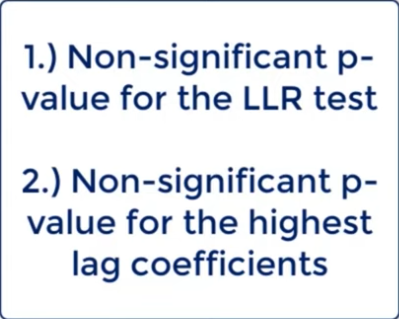

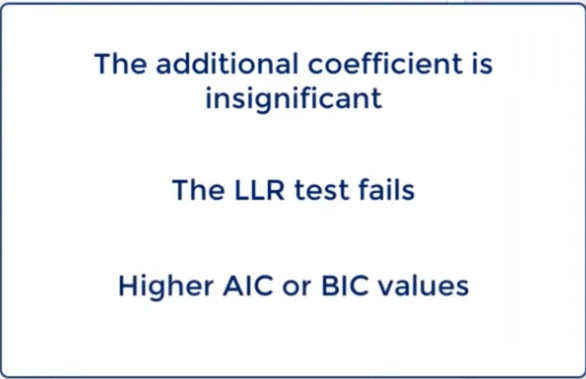

The `LLR_test` function you've defined is used to compare the fit of two models on the same dataset. It doesn't directly involve a testing set. 

The function uses the log-likelihood values (`llf`) from two fitted models (`model_1` and `model_2`). These models should be fitted on your training data.

The testing set is used later, after you've chosen the best model using tools like the LLR test. Once you've selected a model, you use the testing set to evaluate how well your chosen model generalizes to new, unseen data.

Here's a general workflow:

1. Split your data into a training set and a testing set.
2. Fit several models to the training set.
3. Use statistical tests (like the LLR test) and criteria (like AIC and BIC) to compare the fit of these models and select the best one.
4. Use the chosen model to make predictions on the testing set.
5. Evaluate the accuracy of these predictions to assess how well your model is likely to perform on new, unseen data.

### **Normalizing**

In time series analysis, normalization is a crucial preprocessing step that involves adjusting the values in the series to a common scale. When we normalize a set of values, we typically transform each value to a ratio relative to the first value in the series. This is done by dividing each value in the series by the first value.

For example, if we have a time series [100, 105, 110, 120], normalizing this series by the first value would result in [1, 1.05, 1.1, 1.2]. Here, each value represents the proportion of the original value relative to the first value.

The resulting normalized series is much easier to compare with other time series, especially when the original series have different scales or units. This is because normalization removes the effect of the scale of the values, allowing us to focus on the underlying patterns and trends.

In practical terms, normalization can be particularly useful in financial analysis. By normalizing two or more time series representing the prices of different assets, we can compare their performance relative to each other. This can help us make investment decisions, such as which asset to invest in and which one to avoid, based on their relative performance rather than their absolute price levels.

Consider example with Apple (AAPL) and Samsung. If the price of AAPL increases by $100 from an original price of $1000, this represents a 10% increase. On the other hand, if the price of Samsung increases by $80 from an original price of $100, this represents an 80% increase.

Even though the absolute increase in the price of AAPL ($100) is larger than the increase in the price of Samsung ($80), the relative increase (or return) is actually much larger for Samsung. This means that, in terms of percentage, an investment in Samsung would have yielded a higher return.

This is why we normalize time series data - it allows us to compare the relative changes in different series, regardless of their absolute levels. By doing so, we can make more informed decisions about which investments are likely to yield the highest returns.

In [39]:
# Scale by the first value of the series
benchmark = df['close_return'].iloc[0]
df['normalized'] = df['close_return'].div(benchmark).mul(100)   
df.head()

,close_diff,close_return,normalized
date,,,
2013-02-13,-0.127200,-0.190297,100.000000
2013-02-14,-0.060000,-0.089934,47.259745
2013-02-15,-0.918500,-1.377979,724.119164
2013-02-18,-0.018225,-0.027724,14.568825
2013-02-19,-0.006075,-0.009244,4.857622


In [40]:
# Normalize does not affect the stationarity of the series
check_stationarity(df['normalized'])

ADF Statistic: -34.743520
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Also, normalize will not affect the model performance, check by running the model again


### Analysis the Residuals

Component e<sub>t</sub> in AR equation. The optimal is that this resudual is White Noise

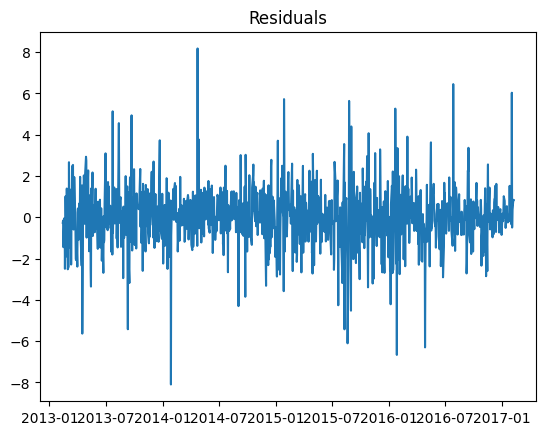

In [42]:
import matplotlib.pyplot as plt

residuals = df['close_return'] - result_ar.predict()
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [43]:
residuals.mean()

2.1057645876259707e-05

In [44]:
residuals.var()

2.1948512655259402

In [47]:
from statsmodels.tsa.stattools import adfuller

# Drop NaN values
residuals = residuals.dropna()

result = adfuller(residuals)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -32.199099
p-value: 0.000000


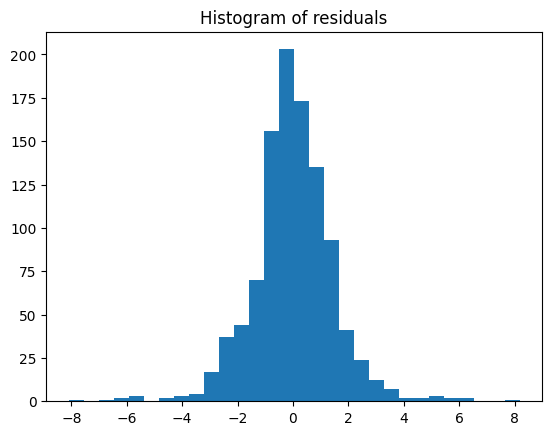

In [48]:
plt.hist(residuals, bins=30)
plt.title('Histogram of residuals')
plt.show()

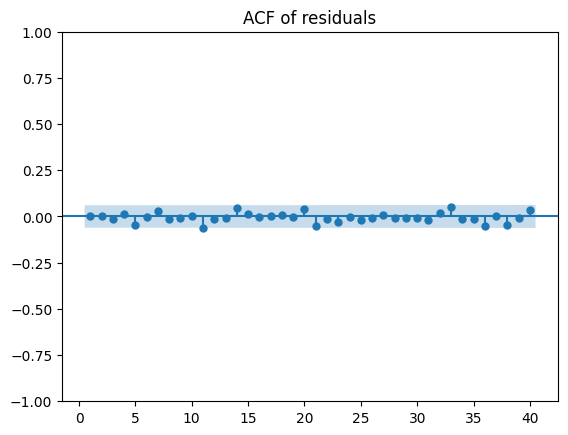

In [52]:
from pandas.plotting import autocorrelation_plot

plot_acf(residuals, lags=40, zero=False)
plt.title('ACF of residuals')
plt.show()

In [50]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_results = acorr_ljungbox(residuals)
print('Ljung-Box test results:', ljung_box_results)

Ljung-Box test results:      lb_stat  lb_pvalue
1   0.000001   0.999118
2   0.005129   0.997439
3   0.227608   0.973014
4   0.410669   0.981594
5   2.561970   0.767135
6   2.565148   0.861107
7   3.520882   0.833009
8   3.703929   0.882800
9   3.742779   0.927512
10  3.745524   0.958098


&rarr; error term is White Noise

# MA